# Úkol - příprava dat, základní statistická analýza

## Portland Housing Prices/Sales Jul 2020 - Jul 2021
- https://www.kaggle.com/datasets/threnjen/portland-housing-prices-sales-jul-2020-jul-2021
- 348 columns
- 25681 records

Pro tento příklad budeme používat podmnožinu s tohoto souboru.

!!! Vytvořený subset nemusí statisticky odpovídat původnímu souboru

## Sub dataset
- Data  = struktura s vyplněnými daty
- m      = počet řádků = 100
- x’s    = vstupní proměnná / features
- y’s    = výstupní promměná / target
- (x, y) = jeden řádek z training dataset
- x(2)   = (4, 5, 3374, 85)
- y(2)   = 1 050 000

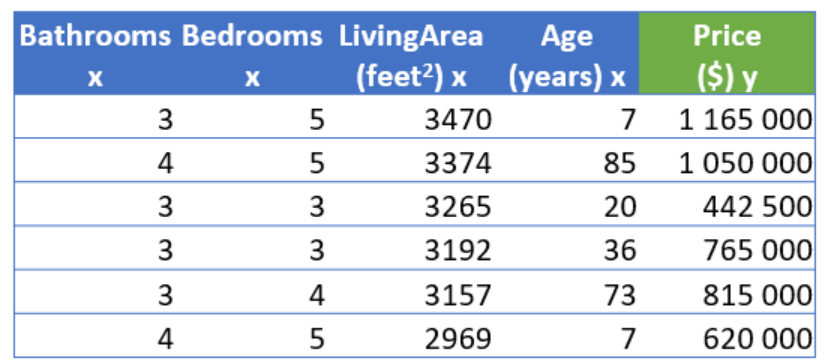

# Úkol

- Proveďte statistickou analýzu dat
- Vizualizujte data
- Vyberte vhodné proměnné pro lineární model
- Standardizujte data

## Čtení dat z CSV souboru

In [3]:
import pandas as pd 

In [4]:
data = pd.read_csv ("..\\dataset\\portland_filtered.csv",  sep=';')

## Základní charakteristiky data
- náhled dat
- zobrazení základních statistik (průměr, minimum, maximum, ...)
- kontrola NaN hodnot

In [5]:
print(data.head())
print(data.describe())
print(data.isnull().sum())

   bathrooms  bedrooms  livingArea  age    price
0          3         5        3470    7  1165000
1          4         5        3374   85  1050000
2          3         3        3265   20   442500
3          3         3        3192   36   765000
4          3         4        3157   73   815000
        bathrooms    bedrooms   livingArea        age         price
count  100.000000  100.000000   100.000000  100.00000  1.000000e+02
mean     2.380000    3.260000  1974.080000   49.88000  5.196074e+05
std      0.838228    0.860115   663.629851   32.77973  1.722241e+05
min      1.000000    1.000000   766.000000    3.00000  1.650000e+05
25%      2.000000    3.000000  1530.000000   20.00000  4.125000e+05
50%      2.000000    3.000000  1859.000000   47.50000  5.000000e+05
75%      3.000000    4.000000  2490.250000   75.25000  5.995312e+05
max      5.000000    6.000000  3470.000000  114.00000  1.165000e+06
bathrooms     0
bedrooms      0
livingArea    0
age           0
price         0
dtype: int64


## Distribuce dat
- grafy s distribucí dat
- boxplot grafy
- popsat, jaká jsou data (vychýlené hodnoty, ...)

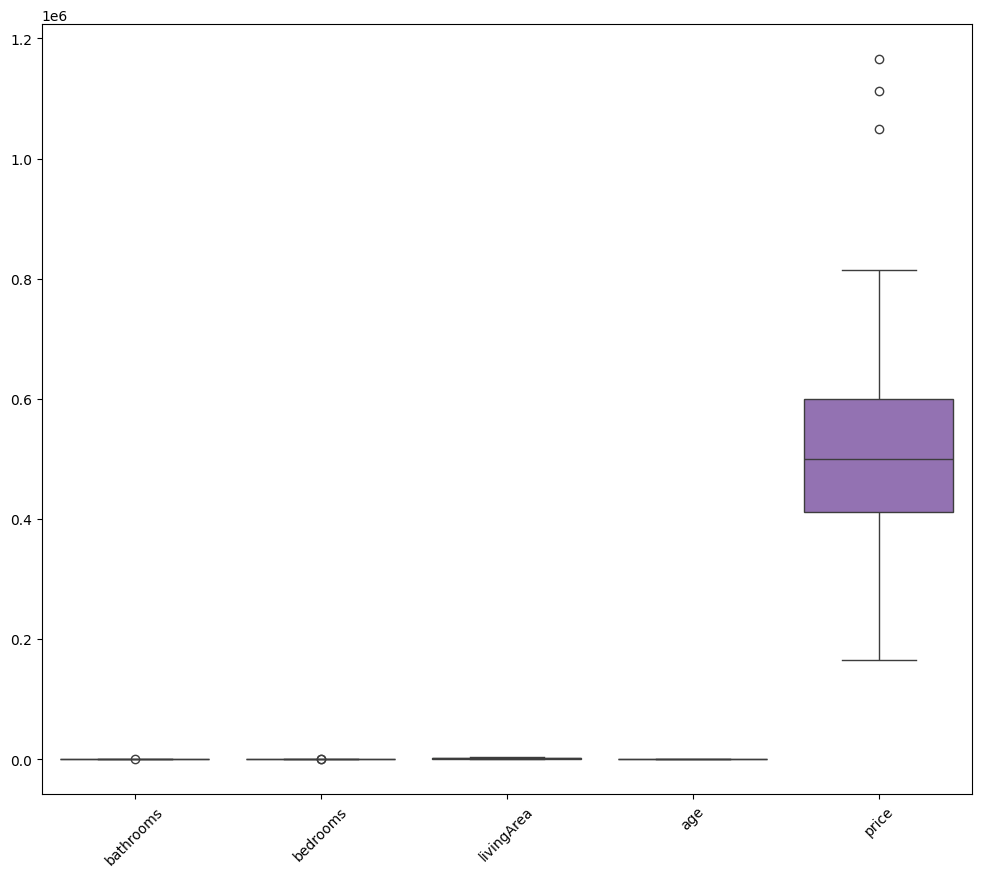

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# data.hist(figsize=(12, 8), bins=30)
# plt.show()

plt.figure(figsize=(12, 10))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

## Vztahy mezi daty
- pairplot
- korelační tabulka
- Určit, které sloupce jsou lineárně závislé, vhodné pro vysvětlení price

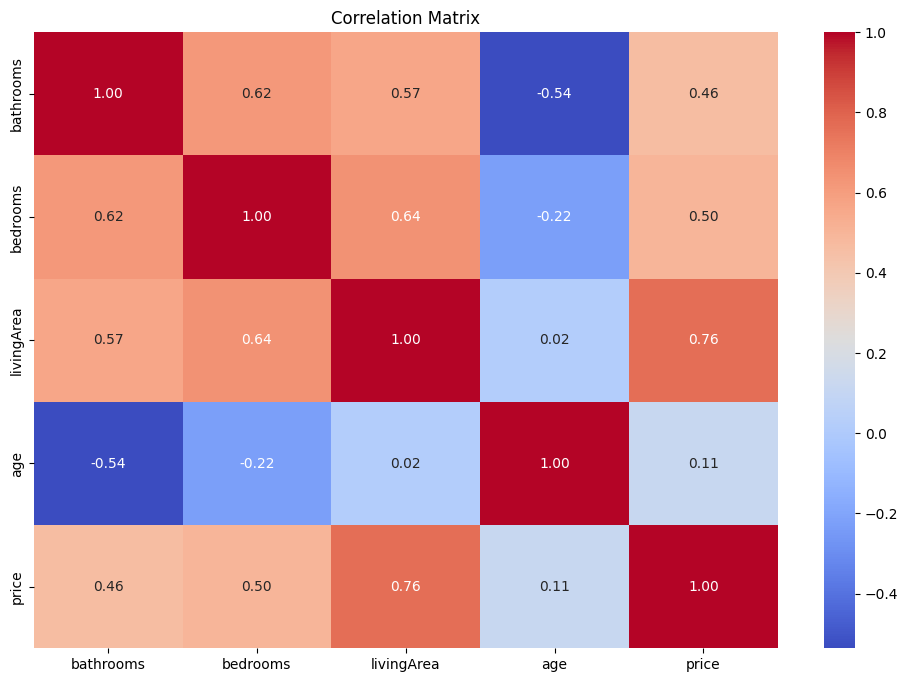

In [9]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## Standardizace dat

Každá funkce má jinou střední, standardní odchylku.

Standardizační centrum a funkce měřítka.

Důvody:
* zabránit tomu, aby některé funkce modelu dominovaly
* může pomoci rychleji konvergovat modely strojového učení
* může usnadnit interpretaci koeficientů modelu strojového učení

Výpočet:
* x_new = (x – střední hodnota) / směrodatná_odchylka
* průměr = součet (x) / počet (x)
* směrodatná_odchylka = sqrt( součet ( (x – průměr)^2 ) / počet (x))

- proveďte standardizaci sloupců použitelných pro linární regresi
- zobrazte rozložení původních a standardizovaných dat

In [11]:
from sklearn.preprocessing import StandardScaler

columns_to_standardize = ['bathrooms', 'bedrooms', 'livingArea', 'age', 'price']
scaler = StandardScaler()
standardized_data = pd.DataFrame(scaler.fit_transform(data[columns_to_standardize]), columns=columns_to_standardize)
print(standardized_data.head())

   bathrooms  bedrooms  livingArea       age     price
0   0.743382  2.033176    2.265504 -1.314716  3.766279
1   1.942385  2.033176    2.120116  1.076791  3.095181
2   0.743382 -0.303808    1.955041 -0.916131 -0.449971
3   0.743382 -0.303808    1.844486 -0.425566  1.432023
4   0.743382  0.864684    1.791480  0.708867  1.723805
